# Crude Oil Price Prediction

### Problem Statement: Predicting Crude Oil Price using Time Series Analysis

Addressing the challenge of forecasting crude oil prices involves navigating through various methods and tuning numerous hyperparameters specific to each method.

For this task, I've opted for Time Series Forecasting using the Prophet library in Python.

Time series forecasting poses complexity due to the multitude of available methods and their associated hyperparameters. Prophet, an open-source library developed by Facebook, offers a solution tailored for making forecasts on univariate time series datasets. It's designed to be user-friendly and can automatically determine optimal hyperparameters, aiming to generate accurate forecasts for data exhibiting trends and seasonal patterns by default.

## Project Overview

In this project, I'll guide you through the usage of the Prophet library for time series forecasting.

Upon completion, you'll gain insights into:

- **Prophet:** An open-source library from Facebook, specialized in automatic forecasting for univariate time series data.
- **Fitting Prophet Models:** Learn how to fit Prophet models and utilize them for both in-sample and out-of-sample forecasts.
- **Evaluation:** Explore techniques for evaluating the performance of a Prophet model on a hold-out dataset.

By the end of this tutorial, you'll be equipped with the knowledge and skills to effectively leverage the Prophet library for accurate time series forecasting in the context of predicting crude oil prices.

# Steps Involved in this Project are:

- **Data Wrangling**
  - Clean and preprocess the raw data.
  - Handle missing values and outliers.
  - Convert data into a suitable format for analysis.

- **Data Visualization**
  - Explore the data through visualizations.
  - Identify patterns, trends, and insights.
  - Use plots and charts to effectively communicate findings.

- **Predictions**
  - Choose a predictive model.
  - Train the model using historical data.
  - Evaluate the model's performance.
  - Make predictions on new or unseen data.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Prophet Forecasting Library

**Prophet**, often referred to as "Facebook Prophet," is an open-source library tailored for univariate (one variable) time series forecasting, proudly developed by Facebook.

This forecasting powerhouse employs an additive time series model, supporting the incorporation of trends, seasonality, and holiday effects. The implementation is based on a procedure that forecasts time series data by fitting non-linear trends with yearly, weekly, and daily seasonality, along with holiday impacts (Package ‘prophet’, 2019).

Designed to be effortlessly user-friendly, Prophet offers a seamless experience — just point it at a time series, and voilà, you get a forecast. Originally intended for internal company applications such as sales and capacity forecasting, Prophet has proven to be a robust tool.

For an in-depth exploration of Prophet and its vast capabilities, delve into the post titled "Prophet: forecasting at scale" from 2017.

This versatile library provides interfaces for both R and Python. In this tutorial, we'll concentrate on harnessing the power of Prophet through its Python interface.

To kickstart your journey with Prophet, the initial step involves installing the library using Pip. Execute the following command:

```python
!pip install prophet


In [3]:
!pip install prophet

# Confirming Prophet Library Installation

Next, let's confirm that the Prophet library was installed correctly.

To do this, we can import the library and print the version number in Python. Here's a complete example:




In [4]:
!pip show prophet



Name: prophet
Version: 1.1.5
Summary: Automatic Forecasting Procedure
Home-page: 
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


Now let us import some of the usefull libraries from the prophet

In [5]:
from prophet import Prophet # Time series prediction library
from prophet.diagnostics import cross_validation # For cross validation
from prophet.diagnostics import performance_metrics # Metrics
from prophet.plot import plot_cross_validation_metric # metric plot

# About the Dataset

**Context:**
The price of oil plays a pivotal role in the economic landscape of any country. The Crude Oil WTI (USD/Bbl) dataset has been curated with the aim of comprehending the influence of global oil prices on the economies of nations.

**Source:**
This dataset is sourced from [Trading Economics](https://tradingeconomics.com/commodity/crude-oil). The data will be consistently updated on a monthly basis.

**Acknowledgment:**
Special thanks to [tradingeconomics.com](https://tradingeconomics.com) for providing this valuable dataset.


**Data Wrangling**

In [6]:
co_data=pd.read_csv("/content/drive/MyDrive/Kaggle_DataSets/crude-oil-price.csv", parse_dates=['date'])

In [7]:
co_data.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646,1.36
2,1983-05-02,30.25,-1.241,-0.38
3,1983-06-01,31.38,3.736,1.13
4,1983-07-01,32.00,1.976,0.62


In [8]:
co_data.tail()

,date,price,percentChange,change
484,2023-07-03,81.3200,14.891,10.5400
485,2023-08-01,82.9600,2.017,1.6400
486,2023-09-01,88.8000,7.040,5.8400
487,2023-10-02,81.0200,-8.761,-7.7800
488,2023-11-01,81.1874,0.207,0.1674


In [9]:
co_data.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [10]:
co_data.describe()

,price,percentChange,change
count,489.000000,488.000000,488.000000
mean,45.703021,0.751545,0.106388
std,28.960721,10.545348,4.968723
min,10.420000,-54.245000,-32.830000
25%,20.410000,-5.152500,-1.685000
50%,32.520000,0.924500,0.260000
75%,67.810000,6.389750,2.352500
max,140.000000,88.376000,16.650000


In [11]:
missing_data=co_data.isnull()
missing_data

,date,price,percentChange,change
0,False,False,True,True
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False
487,False,False,False,False


In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

date
False    489
Name: date, dtype: int64

price
False    489
Name: price, dtype: int64

percentChange
False    488
True       1
Name: percentChange, dtype: int64

change
False    488
True       1
Name: change, dtype: int64



In [13]:
print(co_data.columns)

Index(['date', 'price', 'percentChange', 'change'], dtype='object')


In [14]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           489 non-null    datetime64[ns]
 1   price          489 non-null    float64       
 2   percentChange  488 non-null    float64       
 3   change         488 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 KB


In [15]:
ave_percentageChange=co_data['percentChange'].astype('float').mean(axis=0)
ave_percentageChange

0.751545081967213

In [16]:
co_data['percentChange'].fillna(ave_percentageChange, inplace=True)

In [17]:
ave_change = co_data['change'].astype('float').mean(axis=0)
ave_change

0.10638811475409832

In [18]:
co_data['change'].fillna(ave_change, inplace=True)

In [19]:
co_data.isnull()

,date,price,percentChange,change
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False
487,False,False,False,False


In [20]:
co_data.dtypes

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [21]:
co_data.describe()

,price,percentChange,change
count,489.000000,489.000000,489.000000
mean,45.703021,0.751545,0.106388
std,28.960721,10.534538,4.963629
min,10.420000,-54.245000,-32.830000
25%,20.410000,-5.146000,-1.680000
50%,32.520000,0.920000,0.250000
75%,67.810000,6.377000,2.340000
max,140.000000,88.376000,16.650000


- **Max Price:** $140 USD/bbl

- **Min Price:** $10.42 USD/bbl
- **No Missing Values Detected**


# Data Visualization

# Understanding Time-Series Data through Visualization

A time-series dataset becomes more interpretable when visualized. Plotting the data allows us to discern trends, seasonal cycles, outliers, and more, providing an intuitive feel for the underlying patterns.

In Pandas, plotting a time series is straightforward. You can use the `plot()` function on the DataFrame to create visualizations.

Here's a complete example:

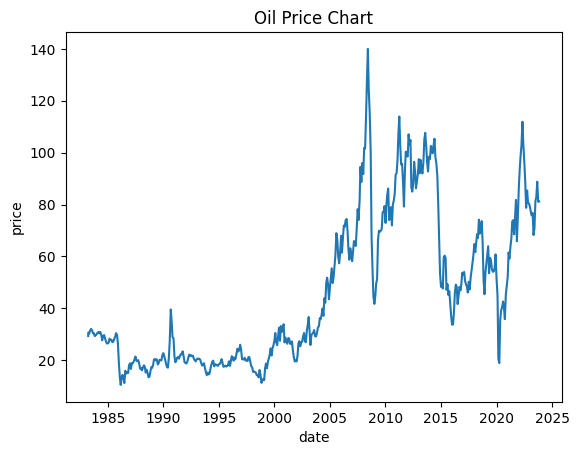

In [22]:
# Date vs Price line plot
plt.figure()
sns.lineplot(data=co_data, x = 'date', y = 'price')
plt.title('Oil Price Chart')
plt.show()

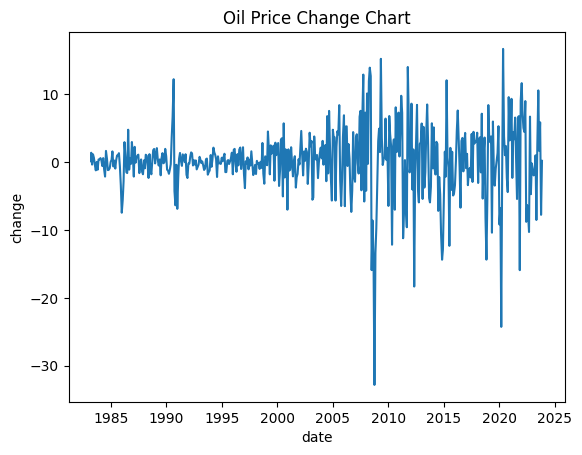

In [23]:
# Date vs Change line plot
plt.figure()
sns.lineplot(data=co_data, x = 'date', y = 'change')
plt.title('Oil Price Change Chart')
plt.show()

# Fit Prophet Model

To utilize Prophet for time series forecasting, follow these steps:

1. Define a `Prophet()` object, which will serve as your forecasting model.
2. Configure the model by specifying parameters such as the type of growth, seasonality, and other settings. By default, Prophet can automatically infer most of the configurations.
3. Fit the model on the dataset using the `fit()` function. Provide the time series data in a DataFrame format.


In [24]:
model= Prophet()

In [25]:
# Renaming the columns for model prediction with prophet
co_data = co_data.rename(columns = {'date':'ds', 'price':'y'})

In [26]:
co_data.head()

,ds,y,percentChange,change
0,1983-03-30,29.27,0.751545,0.106388
1,1983-04-04,30.63,4.646000,1.360000
2,1983-05-02,30.25,-1.241000,-0.380000
3,1983-06-01,31.38,3.736000,1.130000
4,1983-07-01,32.00,1.976000,0.620000


Running the example loads the dataset, prepares the DataFrame in the expected format, and fits a Prophet model.

By default, the library provides a lot of verbose output during the fit process. I think it’s a bad idea in general as it trains developers to ignore output.

Nevertheless, the output summarizes what happened during the model fitting process, specifically the optimization processes that ran.

In [27]:
co_data.dtypes

ds               datetime64[ns]
y                       float64
percentChange           float64
change                  float64
dtype: object

In [28]:
model.fit(co_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_fcvoll/kgd8yq3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_fcvoll/13brpw_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76484', 'data', 'file=/tmp/tmpc_fcvoll/kgd8yq3k.json', 'init=/tmp/tmpc_fcvoll/13brpw_s.json', 'output', 'file=/tmp/tmpc_fcvoll/prophet_modelnbgamusm/prophet_model-20231125003631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Make In-Sample Forecast
It can be useful to make a forecast on historical data.

That is, we can make a forecast on data used as input to train the model. Ideally, the model has seen the data before and would make a perfect prediction.

Nevertheless, this is not the case as the model tries to generalize across all cases in the data.

This is called making an in-sample (in training set sample) forecast and reviewing the results can give insight into how good the model is. That is, how well it learned the training data.

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named ‘ds‘ and rows with date-times for all the intervals to be predicted.

In [29]:
# Future dataframe with 24 months
future = model.make_future_dataframe(periods=24,freq = 'M')
future.tail(12)

,ds
501,2024-11-30
502,2024-12-31
503,2025-01-31
504,2025-02-28
505,2025-03-31
506,2025-04-30
507,2025-05-31
508,2025-06-30
509,2025-07-31
510,2025-08-31


This DataFrame can then be provided to the predict() function to calculate a forecast.

The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty of the forecast.

In [30]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1983-03-30,21.593027,4.156537,40.437211
1,1983-04-04,22.982301,5.071428,41.690202
2,1983-05-02,21.954919,2.644259,40.768523
3,1983-06-01,21.010225,2.253134,40.598256
4,1983-07-01,24.237344,5.250126,43.143545


# Manually Evaluate Forecast Model
It is critical to develop an objective estimate of a forecast model’s performance.

This can be achieved by holding some data back from the model, such as the last 12 months. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 24 months removed.

In [31]:
train = co_data.drop(co_data.index[-24:])
train.tail()

,ds,y,percentChange,change
460,2021-07-01,73.95,0.653,0.48
461,2021-08-02,68.50,-7.370,-5.45
462,2021-09-01,75.03,9.533,6.53
463,2021-10-01,81.78,8.996,6.75
464,2021-11-01,65.85,-19.479,-15.93


A forecast can then be made on the last 24 months of date-times.

We can then retrieve the forecast values and the expected values from the original dataset and calculate a mean absolute error metric using the scikit-learn library.

In [32]:
from sklearn.metrics import mean_absolute_error

In [38]:
# calculate MAE between expected and predicted values for december
y_true = co_data['y'].values
y_pred = forecast['yhat'][:-24].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
rmse= np.sqrt(mae)
print('RMSE: %.3f' % rmse)


MAE: 10.260
RMSE: 3.203


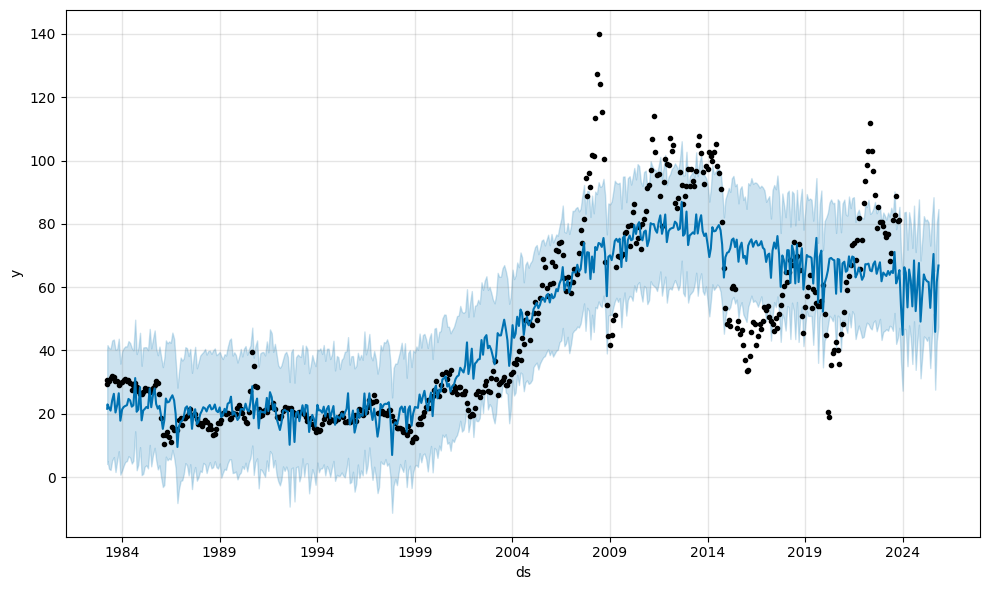

In [34]:
fig1 = model.plot(forecast)
plt.show()

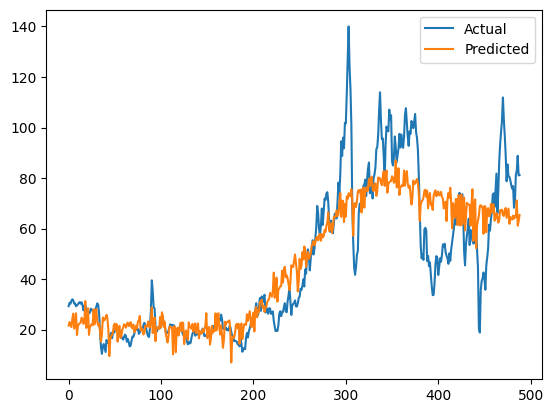

In [35]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

The above figure show the Actual and Predicted prices of Crude oil. In the above figure our model has predicted the price with precision and has MAE(Mean Absolute Error) of 10.260 USB/BBL. This shows that our model is good engough to predict the Crude oil Price with MAE of 10.260.

<Figure size 640x480 with 0 Axes>

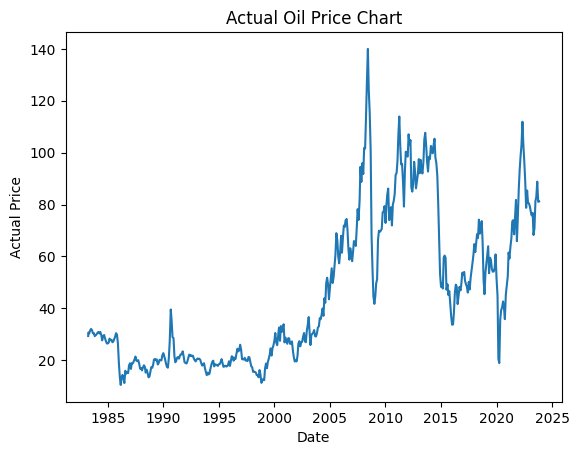

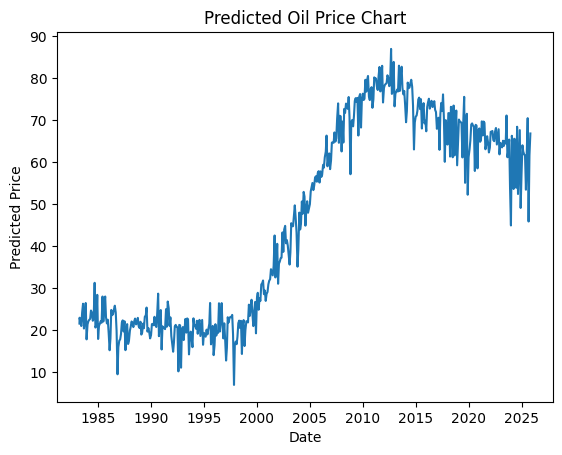

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure()

# Date vs Price line plot
plt.figure()
sns.lineplot(data=co_data, x = 'ds', y = 'y')
plt.title('Actual Oil Price Chart')
plt.xlabel('Date')
plt.ylabel('Actual Price')
plt.show()

# Forecasted Price Chart
plt.figure()
sns.lineplot(data=forecast, x = 'ds', y = 'yhat')
plt.title('Predicted Oil Price Chart')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.show()

plt.tight_layout()
plt.show()

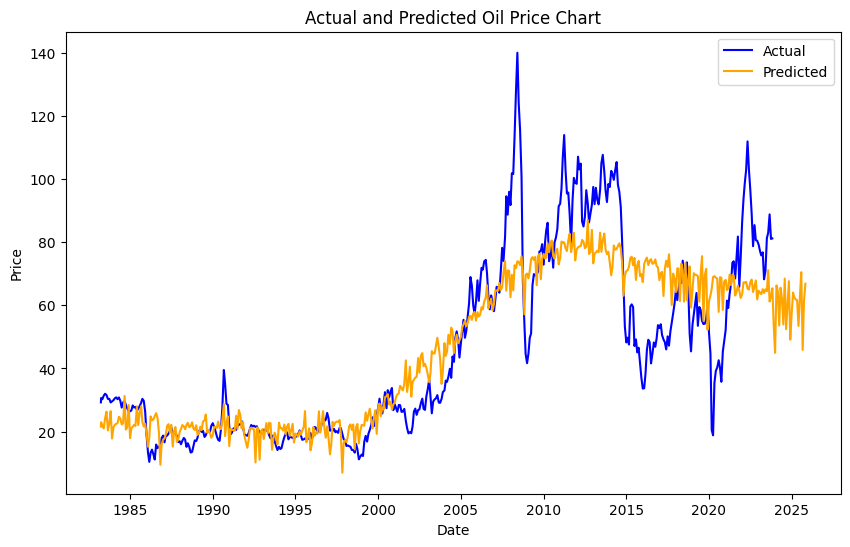

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=co_data, x='ds', y='y', label='Actual', color='blue')

# Forecasted Price Chart
sns.lineplot(data=forecast, x='ds', y='yhat', label='Predicted', color='orange')

plt.title('Actual and Predicted Oil Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # Add a legend to differentiate between actual and predicted lines
plt.show()

In the above left side figure represents the **Actual Oil Price Chart** of the Crude Oil and The the right side figure represents the **Predicted Oil Price Chart** of the Crude Oil over the time from 1985 to 2025, But the crude oil price may vary depending upon following situations:

1. Global Production
2. Global Demand
3. Political Stability
4. OPEC Decisions
5. Global Economic Conditions
6. Currency Exchange Rates
7. Natural Disasters
8. Environmental Regulations
9. Technological Innovations
10. Market Sentiment and Speculation
11. Infrastructure and Transportation Costs
12. Trade Agreements
13. Pandemics

These factors contribute to the complex dynamics of crude oil prices, influencing supply, demand, and market sentiment on a global scale.

